In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\user\OneDrive\Bureau\data.csv\Crimes_-_2001_to_Present_20240603.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16064\857454659.py:2: DtypeWarning: Columns (0,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\user\OneDrive\Bureau\data.csv\Crimes_-_2001_to_Present_20240603.csv')


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [2]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [3]:
df['DATE'] = df['Date'].dt.date
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DATE
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,2015-03-18
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2014-06-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914274 entries, 0 to 914273
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    914274 non-null  object        
 1   Case Number           914270 non-null  object        
 2   Date                  914269 non-null  datetime64[ns]
 3   Block                 914269 non-null  object        
 4   IUCR                  914269 non-null  object        
 5   Primary Type          914269 non-null  object        
 6   Description           914269 non-null  object        
 7   Location Description  908998 non-null  object        
 8   Arrest                914269 non-null  object        
 9   Domestic              914269 non-null  object        
 10  Beat                  914269 non-null  float64       
 11  District              914268 non-null  float64       
 12  Ward                  914012 non-null  float64       
 13 

In [5]:
from datetime import date, timedelta
import holidays
import datetime as dt
from holidays import country_holidays

In [6]:
us_holidays = holidays.US()

In [7]:
# Generate holiday data for US from 2001 to 2024
start_date = date(2001, 1, 1)
end_date = date(2024, 12, 31)
delta = timedelta(days=1)

data = ((d, 1) for d in holidays.US(years=range(2001, 2025)))
df_holy = pd.DataFrame(data, columns=['date', 'holiday'])
df_holy

,date,holiday
0,2001-01-01,1
1,2001-01-15,1
2,2001-02-19,1
3,2001-05-28,1
4,2001-07-04,1
...,...,...
268,2024-09-02,1
269,2024-10-14,1
270,2024-11-11,1
271,2024-11-28,1


In [8]:
df_holy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     273 non-null    object
 1   holiday  273 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [9]:
df_holy['date']=pd.to_datetime(df_holy['date'])

In [10]:
merged_df = pd.merge(df, df_holy, left_on='DATE', right_on='date', how = 'left')
merged_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DATE,date,holiday
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,2015-03-18,NaT,NaN
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20,NaT,NaN
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01,NaT,NaN
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20,NaT,NaN
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2014-06-01,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914269,4678188,HM278662,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
914270,"""error"" : true",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
914271,"""message"" : ""Internal error""",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
914272,"""status"" : 500",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [11]:
merged_df['holiday'].fillna(0, inplace = True)

In [12]:
merged_df['holiday'].value_counts()

0.0    879124
1.0     35150
Name: holiday, dtype: int64

In [13]:
merged_df = merged_df[:914269]
merged_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DATE,date,holiday
0,11037294,JA371270,2015-03-18 12:00:00,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN,2015-03-18,NaT,0.0
1,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20,NaT,0.0
2,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01,NaT,0.0
3,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-12-20,NaT,0.0
4,11645601,JC212935,2014-06-01 00:01:00,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2014-06-01,NaT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914264,4631292,HM227020,2006-03-11 19:55:00,042XX W NORTH AVE,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,ALLEY,True,False,...,1147974.0,1910299.0,2006.0,02/28/2018 03:56:25 PM,41.909811,-87.731842,"(41.909810815, -87.731842)",2006-03-11,NaT,0.0
914265,4610709,HM203645,2006-02-26 08:00:00,009XX N ST LOUIS AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,1152872.0,1906058.0,2006.0,02/28/2018 03:56:25 PM,41.898077,-87.713961,"(41.898077451, -87.713961153)",2006-02-26,NaT,0.0
914266,4650905,HM249873,2006-03-24 10:00:00,042XX S DR MARTIN LUTHER KING JR DR,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,1179568.0,1876769.0,2006.0,02/28/2018 03:56:25 PM,41.817136,-87.616808,"(41.817135916, -87.616807652)",2006-03-24,NaT,0.0
914267,4560181,HM143207,2006-01-24 21:40:00,044XX W 87TH ST,2870,PUBLIC PEACE VIOLATION,PEEPING TOM,APARTMENT,True,False,...,1148131.0,1846465.0,2006.0,02/28/2018 03:56:25 PM,41.734638,-87.732904,"(41.73463822, -87.732903984)",2006-01-24,NaT,0.0


In [14]:
merged_df[merged_df['holiday']==1]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,DATE,date,holiday
6,11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-01-01,2018-01-01,1.0
18,11615821,JC176668,2016-01-01 12:00:00,054XX N NATCHEZ AVE,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,RESIDENCE,False,True,...,NaN,NaN,2016.0,03/08/2019 04:36:43 PM,NaN,NaN,NaN,2016-01-01,2016-01-01,1.0
23,11646766,JC214025,2018-01-01 09:10:00,019XX N KENMORE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,2018.0,04/07/2019 04:05:59 PM,NaN,NaN,NaN,2018-01-01,2018-01-01,1.0
38,11647523,JC215281,2018-11-11 00:01:00,016XX W WALLEN AVE,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,APARTMENT,False,False,...,NaN,NaN,2018.0,04/08/2019 04:19:35 PM,NaN,NaN,NaN,2018-11-11,2018-11-11,1.0
50,11648237,JC216157,2012-01-01 12:00:00,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2012.0,04/09/2019 04:24:58 PM,NaN,NaN,NaN,2012-01-01,2012-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913896,4540301,HM126703,2006-01-16 04:15:00,007XX N WELLS ST,0860,THEFT,RETAIL THEFT,GAS STATION,False,False,...,1174597.0,1905472.0,2006.0,02/28/2018 03:56:25 PM,41.896011,-87.634185,"(41.896011332, -87.634185138)",2006-01-16,2006-01-16,1.0
913897,4566404,HM155371,2006-01-02 00:01:00,100XX W OHARE ST,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,AIRPORT/AIRCRAFT,False,False,...,1100658.0,1934241.0,2006.0,02/28/2018 03:56:25 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)",2006-01-02,2006-01-02,1.0
914047,4539798,HM127763,2006-01-16 17:45:00,079XX S HALSTED ST,0320,ROBBERY,STRONGARM - NO WEAPON,ALLEY,False,False,...,1172345.0,1852224.0,2006.0,02/28/2018 03:56:25 PM,41.749944,-87.644025,"(41.749943887, -87.644025199)",2006-01-16,2006-01-16,1.0
914118,4557595,HM100260,2006-01-01 02:51:40,090XX S EXCHANGE AVE,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,...,1197337.0,1845616.0,2006.0,02/28/2018 03:56:25 PM,41.731225,-87.552665,"(41.731225098, -87.552664872)",2006-01-01,2006-01-01,1.0


In [15]:
df_merged = merged_df.copy()

In [16]:
df_merged.drop(columns = ['DATE', 'date', 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location', 'Updated On', 'Block', 'IUCR', 'FBI Code'], inplace = True)
df_merged.isnull().sum()

ID                         0
Case Number                0
Date                       0
Primary Type               0
Description                0
Location Description    5271
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                     257
Community Area           249
Year                       0
holiday                    0
dtype: int64

### Handling Missing Values

* df_merged['Ward']

C:\Users\user\AppData\Local\Temp\ipykernel_16064\2819216953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_merged['Ward'])


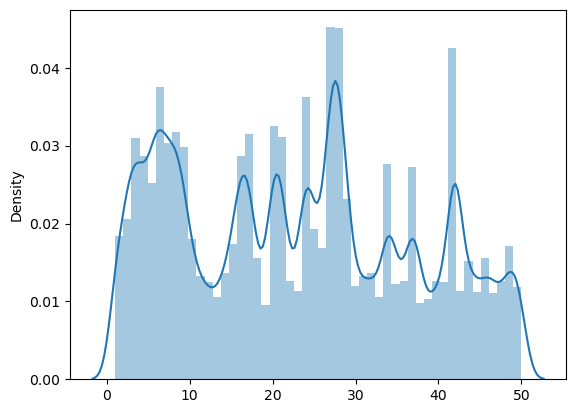

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x=df_merged['Ward'])
plt.show()

In [18]:
median_Ward = df_merged['Ward'].median()
print(f'The median_Width : {median_Ward}')

The median_Width : 23.0


In [19]:
df_merged['Ward'] = df_merged['Ward'].fillna(median_Ward)

* df_merged['Community Area']

C:\Users\user\AppData\Local\Temp\ipykernel_16064\1971794626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_merged['Community Area'])


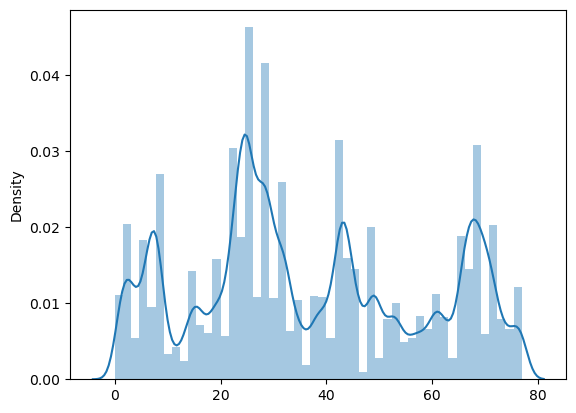

In [20]:
sns.distplot(x=df_merged['Community Area'])
plt.show()

In [21]:
mode_comm = df_merged['Community Area'].mode()
print(f'The mode_comm : {mode_comm}')

The mode_comm : 0    25.0
Name: Community Area, dtype: float64


In [22]:
df_merged['Community Area'] = df_merged['Community Area'].fillna(mode_comm)

* merged_df['Location Description']

In [23]:
df_merged['Location Description'].value_counts()

STREET                                    242480
APARTMENT                                 164404
RESIDENCE                                 134593
SIDEWALK                                   54838
PARKING LOT / GARAGE (NON RESIDENTIAL)     26011
                                           ...  
VESTIBULE                                      1
TAVERN                                         1
CTA SUBWAY STATION                             1
HOTEL                                          1
COUNTY JAIL                                    1
Name: Location Description, Length: 166, dtype: int64

In [24]:
df_merged['Location Description'].ffill(inplace = True)

* merged_df['District']

In [25]:
df_merged = df_merged.dropna()

In [26]:
## Confirm no NaT
df_merged.isna().sum()

ID                      0
Case Number             0
Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Year                    0
holiday                 0
dtype: int64

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914019 entries, 0 to 914268
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    914019 non-null  object        
 1   Case Number           914019 non-null  object        
 2   Date                  914019 non-null  datetime64[ns]
 3   Primary Type          914019 non-null  object        
 4   Description           914019 non-null  object        
 5   Location Description  914019 non-null  object        
 6   Arrest                914019 non-null  object        
 7   Domestic              914019 non-null  object        
 8   Beat                  914019 non-null  float64       
 9   District              914019 non-null  float64       
 10  Ward                  914019 non-null  float64       
 11  Community Area        914019 non-null  float64       
 12  Year                  914019 non-null  float64       
 13 

In [28]:
## now that we remove NaT's let's make our datetime index
df_merged = df_merged.set_index('Date')
df_merged.head()

,ID,Case Number,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,holiday
Date,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111.0,1.0,42.0,32.0,2015.0,0.0
2018-12-20 15:00:00,11646293,JC213749,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515.0,25.0,36.0,19.0,2018.0,0.0
2016-05-01 00:25:00,11645836,JC212333,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,824.0,8.0,15.0,63.0,2016.0,0.0
2018-12-20 16:00:00,11645959,JC211511,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724.0,17.0,33.0,14.0,2018.0,0.0
2014-06-01 00:01:00,11645601,JC212935,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222.0,22.0,21.0,71.0,2014.0,0.0


In [29]:
df_resampled = df_merged.resample('D').size()
df_resampled

Date
2001-01-01     24
2001-01-02      0
2001-01-03      1
2001-01-04      0
2001-01-05      2
             ... 
2024-05-22    741
2024-05-23    719
2024-05-24    716
2024-05-25    738
2024-05-26     19
Freq: D, Length: 8547, dtype: int64